In [1]:
#Import cluster algorithms
from sklearn.cluster import KMeans, DBSCAN

#Import classifiers
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import VotingClassifier

#Import libraries to deal with data
import numpy as np
import pandas as pd
import pickle


#Process data libraries
from skimage import io
from scipy import signal
import pylab, wave
from scipy.io import wavfile

#Miscelanous
import math
import time
import os
import warnings


#Graphs and show images
import itertools
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patches



np.random.seed(10)
np.set_printoptions(suppress=True)
warnings.filterwarnings('ignore')
%matplotlib inline 


Functions

In [2]:
def wavInfo(rec_file):
    sample_rate, samples = wavfile.read(rec_file)
    channels  = wave.open(rec_file, 'r').getnchannels()
    return sample_rate, samples, channels


#Function to calculate spectrogram
def calculate_spectrogram(samples, sample_rate, channels):
    # Verify if the audio has one or two channels
    if channels == 2:
        # Use only the second channel
        samples = samples[:, 1]


    # Calculate the spectrogram using scipy.signal.spectrogram
    freqs, times, spectrum = signal.spectrogram(samples[:], nfft=512, window="hann", fs=sample_rate)
    spectrum = spectrum.astype("float64") 

    return freqs, times, spectrum

    



In [30]:
##############################################
#                                            #
#              Image/Plotting                #
#                                            #
##############################################
# Function to visualize the spectrogram
def plotModSpecSimple(times, freqs, specMod, figsize = (8,4), xlab = "", ylab = "", title = "", colorbar = True, patch = None, cmap = "Purples"):
    """ 
        Function to plotspectrograms and bounding boxes in spectrograms
        Input:
            times - np array containing time steps (shape X,1)
            freqs - np array containing frequency steps (shape Y,1)
            specMod - np array containing magnitude values on each time step for each frequency (shape - (Y,X))
            figsize - list containing width and height size for the figure
            xlab - string containining label for x axis
            ylab - string contaiing label for y axis
            title - string containing title for the graph
            colorbar - bool value to decide whether graph should contain colorbar graph or not
            patch - array containing matplotlib.patches to be applied to the plot
            cmap - cmap for color displaying
    """
    print(f"Times shape: {times.shape}")
    print(f"Freqs shape: {freqs.shape}")
    print(f"Spectrum shape: {specMod.shape}")
    
    fig, ax = pylab.subplots(1,1, figsize = figsize)
    ax.set_facecolor("grey")
    im = ax.pcolormesh(times, freqs,(specMod), cmap= cmap)
    
    #Plot spectrogram information given
    ax.pcolormesh(times, freqs,(specMod), cmap= cmap)
    
    #Add all patches to figure, if any
    if (patch !=None ):
        for i in patch:
            ax.add_patch(i)
    
    #Set x axis label
    ax.set_xlabel(xlab)
    
    #Set y axis label
    ax.set_ylabel(ylab)
    
    #Set title label
    ax.set_title(title)
    
    #Set colorbar if wanted
    if(colorbar):
        fig.colorbar(im, ax=ax)

Times shape: (12740,)
Freqs shape: (257,)
Spectrum shape: (257, 12740)


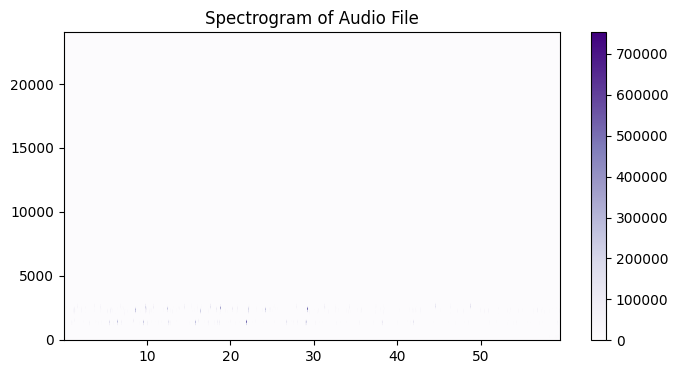

In [32]:
#audio file path
path = "03-10-3022_30_38.wav"


# Get WAV info
sample_rate, samples, channels = wavInfo(path)

# Calculate spectrogram
freqs, times, spectrum = calculate_spectrogram(samples, sample_rate, channels)

# print(freqs)
# print(times)


# Plot spectrogram
plotModSpecSimple(times, freqs, spectrum, title="Spectrogram of Audio File")


In [4]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')